# Checkpoint 1: Data Cleaning 1

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
#Load the rounds data into data frames and name them rounds2
round2 = pd.read_csv("D:\\upgrad\\rounds2.csv",encoding="ISO-8859-1")
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [150]:
#Load the companies data into data frames and name them companies
companies = pd.read_csv("D:\\upgrad\\companies.txt",delimiter = "\t",encoding="ISO-8859-1")
companies.head()                   

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [151]:
#Table 1.1 :How many unique companies are present in rounds2?
round2.company_permalink=round2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')
round2['company_permalink'] = round2['company_permalink'].str.lower() #case is changed to lower case
round2['company_permalink'].nunique()

66368

In [152]:
#Table 1.1 :How many unique companies are present in the companies file?
companies.permalink=companies.permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies['permalink']= companies['permalink'].str.lower() #case is changed to lower case
companies['permalink'].nunique()

66368

In [153]:
# Are there any companies in the rounds2 file which are not  present in companies ?
set(companies['permalink'].unique()).difference(set(round2['company_permalink'].unique()))

set()

In [154]:
#Table 1.1 :Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame
# Name the merged frame master_frame. How many observations are present in master_frame ?

master_frame= pd.merge(companies,round2,left_on='permalink',right_on='company_permalink',how='left')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [155]:
master_frame.shape

(114949, 16)

In [156]:
#Inspecting the Null values , column-wise
master_frame.isnull().sum(axis=0)

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [157]:
# Data cleaning from master frame.checking percentage of null values
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [158]:
#cleaning rows having null values
master_frame = master_frame[~(master_frame.raised_amount_usd.isnull()| master_frame.country_code.isnull() 
                              | master_frame.category_list.isnull())]
#removing unnescessary columns
master_frame= master_frame.drop(['funding_round_code','funded_at','region','status','city','founded_at','homepage_url',
                                'state_code','permalink','funding_round_permalink'], axis=1)

In [159]:
#Percentage of retained rows
print(100*(len(master_frame.index)/114949))

77.01589400516751


In [160]:
#checking percentage of null values
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

name                  0.0
category_list         0.0
country_code          0.0
company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [161]:
master_frame.shape

(88529, 6)

# Checkpoint 2: Funding Type Analysis

In [162]:
#Converting $ to million $.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,venture,10.00000
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,0.70000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.00000
6,01Games Technology,Games,HKG,/organization/01games-technology,undisclosed,0.04125
7,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,0.04336


In [163]:
#Table 2.1:Average Values of Investments for Each of these Funding Types.Filter 5-15 million USD for most suitable FT

master_frame.groupby('funding_round_type').raised_amount_usd.mean().sort_values(ascending=False)


funding_round_type
post_ipo_debt            169.451790
secondary_market          84.438532
private_equity            73.938486
post_ipo_equity           66.077059
debt_financing            17.167653
undisclosed               15.891661
venture                   11.724223
grant                      4.512698
product_crowdfunding       1.353227
convertible_note           1.337187
angel                      0.971574
seed                       0.747794
equity_crowdfunding        0.509898
non_equity_assistance      0.480753
Name: raised_amount_usd, dtype: float64

In [164]:
#Retaining the rows with only four investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,0.700000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000
7,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,0.043360
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,0.719491


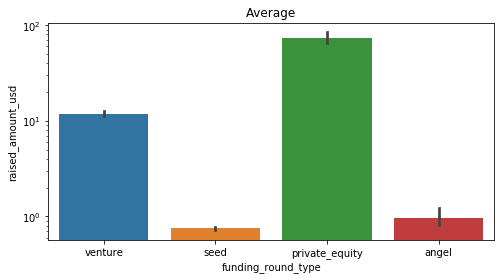

In [165]:
#barplot for above four funding type to show a certain funding type (FT) is best suited for Spark Funds
plt.figure(figsize=(8,4))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.title("Average")
plt.show()

In [166]:
# calculate the total funding(based on count) for investment type.
master_frame.groupby(master_frame.funding_round_type).raised_amount_usd.count().sort_values(ascending=False)

funding_round_type
venture           47809
seed              21095
angel              4400
private_equity     1820
Name: raised_amount_usd, dtype: int64

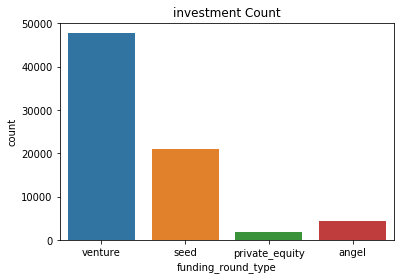

In [167]:
#plot based on investment count for four major FT
sns.countplot(x='funding_round_type',data=master_frame)
plt.title("investment Count")
plt.show()

In [168]:
# calculate the total funding for investment type(sum).
master_frame.groupby(master_frame.funding_round_type).raised_amount_usd.sum().sort_values(ascending=False)

funding_round_type
venture           560523.362596
private_equity    134568.045021
seed               15774.707732
angel               4274.925121
Name: raised_amount_usd, dtype: float64

In [169]:
#Retaining rows with only venture type
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,0.719491
10,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.000000
11,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.700000


In [170]:
#Dropping the column 'funding_round_type' as it is going to be venture type this point forward
master_frame = master_frame.drop(['funding_round_type'], axis = 1)
master_frame.head()

,name,category_list,country_code,company_permalink,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,10.000000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,2.000000
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,0.719491
10,H2O.ai,Analytics,USA,/organization/0xdata,20.000000
11,H2O.ai,Analytics,USA,/organization/0xdata,1.700000


# Checkpoint 3: Country Analysis

In [171]:
#Table 3.1 :For the chosen investment type, make a data frame named top9 with the top nine countries.filter 3 English speaking
top9 = master_frame.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False).head(9)
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


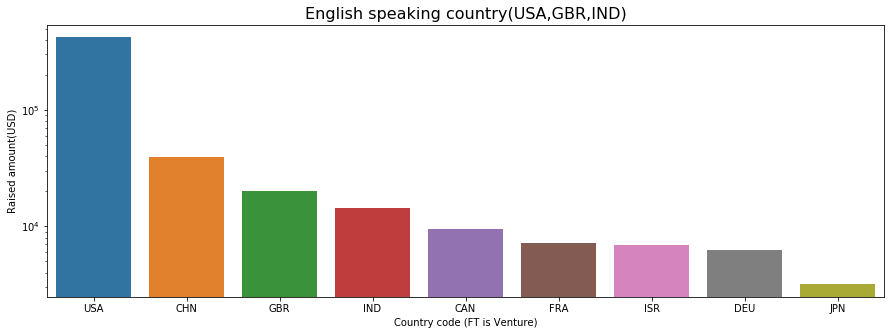

In [172]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT
plt.figure(figsize=(15,5 ))
cp=sns.barplot(x=top9.index, y=top9.raised_amount_usd.ravel())
cp.set_yscale('log')
cp.set(xlabel='Country code (FT is Venture)', ylabel='Raised amount(USD)')
plt.title("English speaking country(USA,GBR,IND)",fontsize =16)
plt.show()

In [173]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]
master_frame.head()

,name,category_list,country_code,company_permalink,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,10.0
10,H2O.ai,Analytics,USA,/organization/0xdata,20.0
11,H2O.ai,Analytics,USA,/organization/0xdata,1.7
12,H2O.ai,Analytics,USA,/organization/0xdata,8.9
22,1 Mainstream,Apps|Cable|Distribution|Software,USA,/organization/1-mainstream,5.0


# Checkpoint 4: Sector Analysis 1

In [174]:
#creating primary sector from category list
primary_sector=master_frame["category_list"].str.split("|", n = 1, expand = True)
master_frame["primary_sector"]=primary_sector[0]
master_frame.head()

,name,category_list,country_code,company_permalink,raised_amount_usd,primary_sector
0,#fame,Media,IND,/organization/-fame,10.0,Media
10,H2O.ai,Analytics,USA,/organization/0xdata,20.0,Analytics
11,H2O.ai,Analytics,USA,/organization/0xdata,1.7,Analytics
12,H2O.ai,Analytics,USA,/organization/0xdata,8.9,Analytics
22,1 Mainstream,Apps|Cable|Distribution|Software,USA,/organization/1-mainstream,5.0,Apps


In [175]:
#checking percentage of null values
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

name                 0.0
category_list        0.0
country_code         0.0
company_permalink    0.0
raised_amount_usd    0.0
primary_sector       0.0
dtype: float64

In [176]:
#dropping category list
master_frame=master_frame.drop(['category_list'],axis=1)

In [177]:
#Reading mapping.csv file 
mapping = pd.read_csv("D:\\upgrad\\mapping.csv")
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [178]:
#mapping each category list to main sector removing null values
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [179]:
#Extract the primary sector of each category list from the category_list column
#Code for a merged data frame with each primary sector mapped to its main sector.

import pandas as pd
new=mapping["category_list"].str.split("|", n = 1, expand = True)
mapping.loc[:,"primary_sector"]=new.loc[:,0]
mapping=mapping.drop(['category_list'],axis=1)
mapping.head()


,main_sector,primary_sector
1,Manufacturing,3D
2,Manufacturing,3D Printing
3,Manufacturing,3D Technology
7,Manufacturing,Advanced Materials
15,Manufacturing,Agriculture


In [180]:
# merging mapping and master_frame
master_frame = pd.merge(master_frame,mapping ,on='primary_sector',how='left')
master_frame.head()


,name,country_code,company_permalink,raised_amount_usd,primary_sector,main_sector
0,#fame,IND,/organization/-fame,10.0,Media,Entertainment
1,H2O.ai,USA,/organization/0xdata,20.0,Analytics,"Social, Finance, Analytics, Advertising"
2,H2O.ai,USA,/organization/0xdata,1.7,Analytics,"Social, Finance, Analytics, Advertising"
3,H2O.ai,USA,/organization/0xdata,8.9,Analytics,"Social, Finance, Analytics, Advertising"
4,1 Mainstream,USA,/organization/1-mainstream,5.0,Apps,"News, Search and Messaging"


In [181]:
#Number of rows with NaN in main_sector value
len(master_frame[master_frame.main_sector.isnull()])

165

In [182]:
#Retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

38638

In [183]:
master_frame.shape

(38638, 6)

# Checkpoint 5: Sector Analysis 2

In [184]:
#Creating dataframe D1 using country 1 and preffered investment type
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
#creating dataframe for total number and amount invested for each main sector
D1_f = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#Merging the above two dataframes
D1 = D1.merge(D1_f, how='left', on ='main_sector')
D1.head()

,name,country_code,company_permalink,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,H2O.ai,USA,/organization/0xdata,8.900000,Analytics,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,1 Mainstream,USA,/organization/1-mainstream,5.000000,Apps,"News, Search and Messaging",13959.567428,1582
2,128 Technology,USA,/organization/128-technology,11.999347,Service Providers,Others,26321.007002,2950
3,1366 Technologies,USA,/organization/1366-technologies,15.000000,Manufacturing,Manufacturing,7258.553378,799
4,1366 Technologies,USA,/organization/1366-technologies,5.000000,Manufacturing,Manufacturing,7258.553378,799


In [185]:
#Creating dataframe D2 using country 2 and preffered investment type
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
#creating dataframe for total number and amount invested for each main sector
D2_g = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#Merging the above two dataframes
D2 = D2.merge(D2_g, how='left', on ='main_sector')
D2.head()

,name,country_code,company_permalink,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,365Scores,GBR,/organization/365scores,5.500000,Android,"Social, Finance, Analytics, Advertising",1089.404014,133
1,7digital,GBR,/organization/7digital,8.468328,Content Creators,Entertainment,482.784687,56
2,7digital,GBR,/organization/7digital,10.000000,Content Creators,Entertainment,482.784687,56
3,90min,GBR,/organization/90min,15.000000,Media,Entertainment,482.784687,56
4,90min,GBR,/organization/90min,5.800000,Media,Entertainment,482.784687,56


In [186]:
#Creating dataframe D3 using country 3 and preffered investment type
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
#creating dataframe for total number and amount invested for each main sector
D3_h = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#Merging the above two dataframes
D3 = D3.merge(D3_h, how='left', on ='main_sector')
D3.head()

,name,country_code,company_permalink,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,#fame,IND,/organization/-fame,10.000000,Media,Entertainment,280.830000,33
1,21Diamonds,IND,/organization/21diamonds-india,6.369507,E-Commerce,Others,1013.409507,110
2,A LITTLE WORLD,IND,/organization/a-little-world,6.410000,Finance,"Social, Finance, Analytics, Advertising",550.549550,60
3,Adlabs Imagica,IND,/organization/adlabs-imagica,8.180000,Entertainment,Entertainment,280.830000,33
4,Agile,IND,/organization/agile,5.740000,Finance,"Social, Finance, Analytics, Advertising",550.549550,60


In [187]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [188]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318.29
5365.23
2949.54


In [189]:
#Top three sectors for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_f

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1454.104361         167
Cleantech / Semiconductors                   21206.628192        2300
Entertainment                                 5099.197982         591
Health                                        8211.859357         909
Manufacturing                                 7258.553378         799
News, Search and Messaging                   13959.567428        1582
Others                                       26321.007002        2950
Social, Finance, Analytics, Advertising      23807.376964        2714

In [190]:
#Top three sectors for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2_g

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            167.051565          16
Cleantech / Semiconductors                    1150.139665         128
Entertainment                                  482.784687          56
Health                                         214.537510          24
Manufacturing                                  361.940335          42
News, Search and Messaging                     615.746235          73
Others                                        1283.624289         147
Social, Finance, Analytics, Advertising       1089.404014         133

In [191]:
#Top three sectors for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3_h


raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     165.380000          20
Entertainment                                  280.830000          33
Health                                         167.740000          19
Manufacturing                                  200.900000          21
News, Search and Messaging                     433.834545          52
Others                                        1013.409507         110
Social, Finance, Analytics, Advertising        550.549550          60

In [192]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3


In [193]:
#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/shotspotter          67.933006


In [194]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0


In [195]:
#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


In [196]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))


                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0


In [197]:
#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                               raised_amount_usd
company_permalink                               
/organization/manthan-systems               50.7


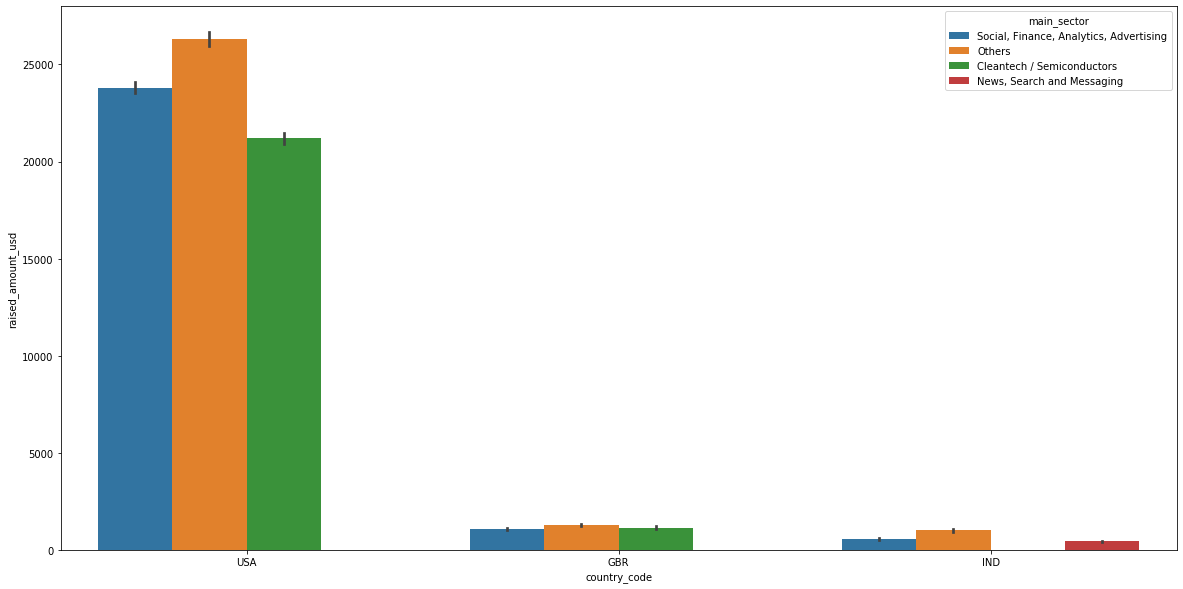

In [198]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
D1=D1[(D1['main_sector']=='Others')|(D1['main_sector']=='Social, Finance, Analytics, Advertising')|(D1['main_sector']=='Cleantech / Semiconductors')]
D2=D2[(D2['main_sector']=='Others')|(D2['main_sector']=='Social, Finance, Analytics, Advertising')|(D2['main_sector']=='Cleantech / Semiconductors')]
D3=D3[(D3['main_sector']=='Others')|(D3['main_sector']=='Social, Finance, Analytics, Advertising')|(D3['main_sector']=='News, Search and Messaging')]
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()